# Titanic Machine Learning from Disaster

Here we have to predict whether a passenger will survive the disaster or not.
Basically it falls under Binary Classification problem.

#### Link to Dataset:

https://www.kaggle.com/c/titanic/data

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statistics import mean , median , mode

pd.pandas.set_option('display.max_columns',None)

### Loading CSV

In [3]:
train_df = pd.read_csv('test.csv')

train_df.shape 

(418, 11)

In [4]:
train_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Missing Value Analysis

In [7]:
train_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

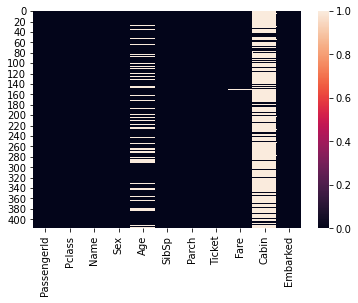

In [8]:
sns.heatmap(train_df.isna())

**Calculating percentages of missing values in each of the dataset:**

In [9]:
missing_features_train = [feature for feature in train_df.columns if train_df[feature].isna().sum() >= 1]
missing_features_train

['Age', 'Fare', 'Cabin']

In [10]:
for feature in missing_features_train:
    missing_perc = round((train_df[feature].isna().sum()/len(train_df))*100 , 2)
    print("{}: {}%".format(feature , missing_perc))

Age: 20.57%
Fare: 0.24%
Cabin: 78.23%


### Let's explore feature by feature

In [11]:
#let's encode Embarked
train_df['Embarked'] = train_df['Embarked'].map({'S':0,'C':1,'Q':2,}).astype(int)
train_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0


**Parch and Sib/Sp:** <br>
Parch is no. of parents/childrens <br>
SibSp is no. of siblings/spouse

In [12]:
train_df.Parch.value_counts()

0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64

In [13]:
train_df.SibSp.value_counts()

0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64

Some of the categories of both Parch and SibSp have very less values. So, we will derive another feature 'Family Size' from these two features. This new feature will indicate total no. of family members aboard on titanic.

In [14]:
train_df['FamilySize'] = train_df['Parch']+train_df['SibSp']
train_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,2,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0,2


**Family Size:**

In [15]:
train_df.FamilySize.value_counts()

0     253
1      74
2      57
3      14
4       7
10      4
6       4
5       3
7       2
Name: FamilySize, dtype: int64

Still FamilySize is having some categories which have very less values and null correlation. So we need to make another feature out of this which will have less categories.

So, we will create a feature IsAlone. It will have 0 if the passenger is alone and 1 if the passenger is with famil members.

In [16]:
train_df['IsAlone'] = np.where(train_df['FamilySize'] >= 1 , 0 , 1)
train_df[['FamilySize','IsAlone']].tail(3)

,FamilySize,IsAlone
415,0,1
416,0,1
417,2,0


In [17]:
train_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,2,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,2,0,1


**Sex:**

In [18]:
train_df.Sex.value_counts()

male      266
female    152
Name: Sex, dtype: int64

No. of male aboard is more than female.

**Ticket:**

In [19]:
len(train_df.Ticket.unique())

363

In [20]:
len(train_df.Ticket)

418

Out of 891 , only 681 are unique. This may be because every family has different ticket number. <br> 
So this variable doesn't provide much information to us. And we may drop it later on.

**Name:**

The names are unique and contains typos. So the only thing we can extract from them is their Title.

In [21]:
dataset = train_df.copy()

In [22]:
dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
dataset[['Name','Title']].head(10)

,Name,Title
0,"Kelly, Mr. James",Mr
1,"Wilkes, Mrs. James (Ellen Needs)",Mrs
2,"Myles, Mr. Thomas Francis",Mr
3,"Wirz, Mr. Albert",Mr
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Mrs
5,"Svensson, Mr. Johan Cervin",Mr
6,"Connolly, Miss. Kate",Miss
7,"Caldwell, Mr. Albert Francis",Mr
8,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",Mrs
9,"Davies, Mr. John Samuel",Mr


In [23]:
train_df = dataset.copy()

In [24]:
a = train_df.groupby('Title')['Age'].mean()

In [25]:
title_age_df = pd.DataFrame()
title_age_df['Title'] = a.index
title_age_df['AgeGrp'] = train_df.groupby('Title')['Age'].mean().values
title_age_df

,Title,AgeGrp
0,Col,50.000000
1,Dona,39.000000
2,Dr,53.000000
3,Master,7.406471
4,Miss,21.774844
5,Mr,32.000000
6,Mrs,38.903226
7,Ms,NaN
8,Rev,35.500000


Title basically represents age group, So wherever Age is missing we can use the Title to fill the Nan values.

In [26]:
import math

In [27]:
title_age_df.loc[title_age_df.Title == 'Mr','AgeGrp'].values

array([32.])

**Filling Missing Values in Age column**

In [28]:
for i in range(0,len(train_df)):
    if(math.isnan(train_df.loc[i,'Age'])):
        
        temp = train_df.loc[i,'Title']
        #getting age value from title dataset
        temp1 = (title_age_df.loc[title_age_df.Title == temp,'AgeGrp'].values).tolist()
        
        #filling nan in original dataset
        train_df.loc[i,'Age'] = temp1

In [29]:
train_df.Age.isna().sum()

1

In [30]:
train_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone',
       'Title'],
      dtype='object')

**Let's drop unnecessary features**

In [31]:
train_df.drop(['Cabin','Ticket','SibSp','Parch','Name'] , axis = 1 , inplace = True)

In [32]:
train_df['Sex'] = train_df['Sex'].map({'male':0 , 'female':1}).astype(int)
train_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
0,892,3,0,34.5,7.8292,2,0,1,Mr
1,893,3,1,47.0,7.0000,0,1,0,Mrs
2,894,2,0,62.0,9.6875,2,0,1,Mr
3,895,3,0,27.0,8.6625,0,0,1,Mr
4,896,3,1,22.0,12.2875,0,2,0,Mrs


**Things to do now:**

Convert Age and Fare into groups and encode them. <br>
Group rare categories of Title into single category and encode them all.

In [34]:
train_df.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

**Reducing Categories in Title:**

In [36]:
train_df['Title'] = train_df['Title'].replace(['Ms','Mlle','Mme','Lady'],'Miss')
train_df['Title'] = train_df['Title'].replace(['Dr','Rev',
                           'Major','Col' ,
                           'Capt' ,'Sir' ,
                           'Countess','Jonkheer',
                           'Don','Dona'],'Rare')
train_df['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64

**Making Age Groups:**

In [38]:
train_df['AgeBand'] = pd.cut(train_df['Age'] , 5)
train_df.AgeBand.value_counts()

(15.336, 30.502]    182
(30.502, 45.668]    147
(45.668, 60.834]     42
(0.0942, 15.336]     36
(60.834, 76.0]       10
Name: AgeBand, dtype: int64

**Making FareGroups:**

In [40]:
train_df['FareBand'] = pd.qcut(train_df['Fare'],4)
train_df.FareBand.value_counts()

(-0.001, 7.896]    114
(14.454, 31.5]     105
(31.5, 512.329]    102
(7.896, 14.454]     96
Name: FareBand, dtype: int64

In [41]:
train_df[['Age','AgeBand','Fare','FareBand']].head()

,Age,AgeBand,Fare,FareBand
0,34.5,"(30.502, 45.668]",7.8292,"(-0.001, 7.896]"
1,47.0,"(45.668, 60.834]",7.0000,"(-0.001, 7.896]"
2,62.0,"(60.834, 76.0]",9.6875,"(7.896, 14.454]"
3,27.0,"(15.336, 30.502]",8.6625,"(7.896, 14.454]"
4,22.0,"(15.336, 30.502]",12.2875,"(7.896, 14.454]"


In [46]:
train_df['AgeBand'] = train_df['AgeBand'].astype(str)
train_df['FareBand'] = train_df['FareBand'].astype(str)
train_df['Title'] = train_df['Title'].astype(str)

In [47]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [48]:
train_df['AgeBand'] = le.fit_transform(train_df['AgeBand'])
train_df['FareBand'] = le.fit_transform(train_df['FareBand'])
train_df['Title'] = le.fit_transform(train_df['Title'])

In [49]:
train_df[['Age','AgeBand','Fare','FareBand']].head()

,Age,AgeBand,Fare,FareBand
0,34.5,2,7.8292,0
1,47.0,3,7.0000,0
2,62.0,4,9.6875,3
3,27.0,1,8.6625,3
4,22.0,1,12.2875,3


In [50]:
train_df.drop(['Age','Fare'] , axis = 1 , inplace = True)

In [51]:
train_df.head()

,PassengerId,Pclass,Sex,Embarked,FamilySize,IsAlone,Title,AgeBand,FareBand
0,892,3,0,2,0,1,2,2,0
1,893,3,1,0,1,0,3,3,0
2,894,2,0,2,0,1,2,4,3
3,895,3,0,0,0,1,2,1,3
4,896,3,1,0,2,0,3,1,3


In [53]:
train_df.to_csv('processed_test.csv',index = False)